<a href="https://colab.research.google.com/github/KonstantinLihota/Resume/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22alfa_challenge_ipynb_seq2seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import OneHotEncoder
from collections import Counter
from torch.utils.data import Dataset, DataLoader, random_split
from typing import List
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch import nn
from sklearn.metrics import classification_report
import sys
from google.colab import drive
import pandas as pd
import numpy as np
import nltk
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Sampler
import torch.optim as optim


In [2]:
device = "cuda:0"
#device = 'cpu'
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')
#from reco_utils.recommender.sar.sar_singlenode import SARSingleNode
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:

df_train = pd.read_csv('/content/gdrive/MyDrive/data/df_train.csv', sep = ';')
df_test = pd.read_csv('/content/gdrive/MyDrive/data/df_train.csv', sep = ';')

In [4]:
df_train['Data'] = df_train.Data.apply(lambda s: list(map(int, s.split(','))))
df_train['Target'] = df_train.Target.apply(lambda s: list(map(int, s.split(','))))
df_test['Data'] = df_test.Data.apply(lambda s: list(map(int, s.split(','))))

In [5]:
np.mean([len(set(i)) for i in df_train['Target']])

4.511446040096687

(array([4.537e+03, 1.817e+03, 4.450e+02, 1.310e+02, 3.100e+01, 1.900e+01,
        7.000e+00, 7.000e+00, 4.000e+00, 1.000e+00, 2.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 6.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([   40.  ,   461.22,   882.44,  1303.66,  1724.88,  2146.1 ,
         2567.32,  2988.54,  3409.76,  3830.98,  4252.2 ,  4673.42,
         5094.64,  5515.86,  5937.08,  6358.3 ,  6779.52,  7200.74,
         7621.96,  8043.18,  8464.4 ,  8885.62,  9306.84,  9728.06,
        10149.28, 10570.5 , 10991.72, 11412.94, 11834.16, 12255.38,
        12676.6 , 13097.82, 13519.04

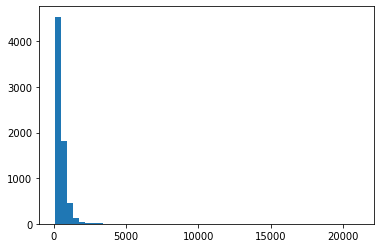

In [6]:
transaction_len = [len(i) for i in df_train['Data']]
plt.hist(transaction_len,bins = 50)

In [7]:
pd.DataFrame(transaction_len).describe()


,0
count,7033.000000
mean,473.322906
std,811.665063
min,40.000000
25%,180.000000
50%,336.000000
75%,570.000000
max,21101.000000


In [8]:
top_codes = df_train['Data'].explode().value_counts()
top  = set(top_codes[top_codes>3000].index)


In [9]:
transaction_set = [set(i) for i in df_train['Data']]

def getDictionary(transaction_set, flag_lab = False):
  all = set()
  for i in transaction_set:
    all|=i
  all = list(all)
  dictionary = {}
  j = 0
  for i in range(len(all)):
    if flag_lab:
      if all[i] in top:
        dictionary.update({all[i]:j})
        j+=1
    else:
        dictionary.update({all[i]:j})
        j+=1


  return dictionary
  
dictionary = getDictionary(transaction_set)
dictionary_lab = getDictionary(transaction_set, True)

In [10]:
dictionary_lab[5912]

26

In [11]:
top_codes

6011    700677
6010    490602
4814    473396
5411    472408
4829    307388
         ...  
9402        24
6513        23
5697        19
8244        13
7629        11
Name: Data, Length: 184, dtype: int64

In [12]:
pd.DataFrame(top_codes).describe()

,Data
count,184.00000
mean,18091.73913
std,83063.01458
min,11.00000
25%,108.75000
50%,564.00000
75%,3767.50000
max,700677.00000


In [13]:
train = df_train['Data']
label = df_train['Target']

In [14]:
top

{4112,
 4812,
 4814,
 4816,
 4829,
 4900,
 5200,
 5211,
 5261,
 5311,
 5331,
 5399,
 5411,
 5499,
 5533,
 5541,
 5621,
 5641,
 5651,
 5661,
 5691,
 5699,
 5712,
 5722,
 5732,
 5735,
 5812,
 5813,
 5814,
 5912,
 5921,
 5941,
 5942,
 5945,
 5964,
 5977,
 5983,
 5995,
 5999,
 6010,
 6011,
 6012,
 6051,
 7311,
 7399,
 7832,
 7994,
 7995,
 8099,
 8999}

In [15]:
Counter([11,11,11,21,21,31]).most_common(1)[0][0]

11

In [16]:
from collections import Counter
for i in range(len(label)):
  for j in range(10):
    if label[i][j] not in top:
      label[i][j] = 8999 #Counter(label[i]).most_common(1)[0][0]

len(set(np.array([np.array(i) for i in label]).reshape(-1,)))
  

50

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
corpus = [' '.join([str(dictionary[i]) for i in transact]) for transact in df_train['Data']]
vectorizer = CountVectorizer()
tr = TfidfTransformer()
X = vectorizer.fit_transform(corpus)
tr.fit(X)
tfdf_date = tr.transform(X).toarray()

In [18]:
l = [1,2,3,4]
l[-2:]

[3, 4]

In [19]:
top10_codes = df_train['Data'].explode().value_counts().head(10)
def get_top_codes(transactions, top_n=10, drop_from=5):
    transactions_stats = sorted(
        Counter(transactions).items(), 
        key=lambda x: x[1], 
        reverse=True
    )[:top_n]
    

    top_codes = [mcc_code for (mcc_code, count) in transactions_stats if count >= drop_from]
    top_codes += list(top10_codes.index)

    return top_codes[:10]


context = df_train['Data'].apply(get_top_codes)

In [20]:
def transform(label):

    label = label[0]
    for j in range(10):
      if label[j] not in top:
        label[j] = 8999 #Counter(label[i]).most_common(1)[0][0]
    return [label ]

class SegDataset(Dataset):

  def __init__(self, data,cont,labels = None, batch_size = 522):
    self.df = []
    self.label = []
    self.context = []
    for ind in range(len(data)):
      #i = 0
      histr = data[ind]
      #while len(histr) > i + batch_size+10:
      #self.df.append([histr[i:i+batch_size-10]])
      #self.label.append( transform([histr[i + batch_size - 10:i + batch_size]]))
      #self.context.append(cont[ind])
      #i+=batch_size 

      if len(histr) < batch_size:

          histr = histr*(batch_size//len(histr)+1)
          self.df.append(histr[-batch_size:])
          self.label.append(labels[ind])
          self.context.append(cont[ind])
      elif labels is not None:
          self.df.append(histr[-batch_size:])
          self.label.append(labels[ind])
          self.context.append(cont[ind])
      
      
    
  def __getitem__(self,index):

     if len(self.df[index])==1:
       self.df[index] = self.df[index][0]
       self.label[index] = self.label[index][0]

     return {"data": torch.tensor([dictionary[i] for i in self.df[index]]) , "label": torch.tensor([dictionary_lab[i] for i in self.label[index]]), 'context': torch.tensor([dictionary[i] for i in self.context[index]])}

  def __len__(self):
     return len(self.label)




dataset = SegDataset(train, context ,label)
train_dataset,valid_dataset  = random_split(dataset, [int(len(dataset)*0.8), len(dataset)-int(len(dataset)*0.8 )])




In [21]:
class SegTestDataset(Dataset):

  def __init__(self, data,context, batch_size = 522):
    self.df = [] 
    self.context = []
    for ind in range(len(data)):
      i = 0
      histr = data[ind]
      self.context.append(context[ind])
      
      if len(histr) < batch_size:

          histr = histr*(batch_size//len(histr)+1)
          self.df.append(histr[10:batch_size])
          #print(len(histr[10:batch_size]))

      else:
          self.df.append(histr[:batch_size-10])
          #print(len(histr[10:batch_size]))
 
      
      
    
  def __getitem__(self,index):
     #print(self.label[index])
     if len(self.df[index])==1:
       self.df[index] = self.df[index][0]
     #print(torch.tensor([dictionary[i] for i in self.df[index]]),  self.label[index] )

     return {"data": torch.tensor([dictionary[i] for i in self.df[index]]), 'context': torch.tensor([dictionary[i] for i in self.context[index]])}

  def __len__(self):
     return len(self.df)

context = df_test['Data'].apply(get_top_codes)
dataset = SegTestDataset(df_test['Data'],context)
test_dataset = torch.utils.data.Subset(dataset, range(len(dataset)))
test_dataset[7]

{'context': tensor([149, 147,  96, 149, 147,  77,  97,  82, 148, 161]),
 'data': tensor([149, 149, 149, 149, 149, 147, 149, 149, 149, 149, 149, 149, 149,  96,
         147, 149, 149, 149, 149, 149, 149, 149, 149, 149,  93, 149, 149, 149,
          96, 149, 149, 149, 149, 147, 149, 149, 149, 149, 149, 149, 149, 149,
         149, 149,  97, 149,  96, 149, 149, 147, 106, 149, 149, 149,  96, 149,
         149, 147, 149,  97, 149, 149, 149,  96,  97,  97, 149,  64, 149, 149,
         149,  93, 149,  96, 149, 149, 149, 149, 147, 149, 149, 149, 149, 149,
         149, 149, 147, 147, 149, 149, 147, 149, 149, 149, 149, 149, 149, 149,
         147,  96, 149, 147, 149, 149, 149, 147, 149, 149, 149, 149, 149, 149,
         149, 147, 149, 149, 149, 149, 149, 149, 149,  96, 147, 149, 149, 149,
         149, 149, 149, 149, 149, 149,  93, 149, 149, 149,  96, 149, 149, 149,
         149, 147, 149, 149, 149, 149, 149, 149, 149, 149, 149, 149,  97, 149,
          96, 149, 149, 147, 106, 149, 149, 149,  9

In [22]:


class ReviewsSampler(Sampler):
    def __init__(self, subset, batch_size=32):
        self.batch_size = batch_size
        self.subset = subset

        self.indices = subset.indices

        self.data = np.array(subset.dataset.df)[self.indices]

    def __iter__(self):

        batch_idx = []

        for index in np.argsort(list(map(len, self.data))):
            batch_idx.append(index)
            if len(batch_idx) == self.batch_size:
                yield batch_idx
                batch_idx = []

        if len(batch_idx) > 0:
            yield batch_idx

    def __len__(self):
        return len(self.dataset)







In [23]:
train_loader = DataLoader(train_dataset, batch_sampler=ReviewsSampler(train_dataset,batch_size=64))
valid_loader = DataLoader(valid_dataset, batch_sampler=ReviewsSampler(valid_dataset, batch_size=64))


In [24]:
test_loader = DataLoader(test_dataset,  batch_sampler=ReviewsSampler(test_dataset,batch_size=64))

In [25]:
for i in test_loader:
  #print(i['data'][0])
  break
for i in train_loader:
  print(i['data'].shape, i['context'].shape)
  break

torch.Size([64, 522]) torch.Size([64, 10])


In [26]:
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, emb_cont_dim, k,  dropout):
        super().__init__()

        self.hid_dim = hid_dim
        
        self.embedding = nn.Embedding(input_dim, emb_dim) 
        #print(emb_cont_dim)
        self.embedding_context =  nn.Linear(k, emb_cont_dim)

        self.rnn = nn.GRU(emb_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        self.relu = nn.ReLU()
        
    def forward(self, src, context):
        
        #src = [src len, batch size]
        #print(src.shape)
        embedded = self.dropout(self.embedding(src))
        #print(embedded.shape)
        emb_cont =self.relu( self.dropout(self.embedding_context (context.to(torch.float))))
        
        #embedded = [src len, batch size, emb dim]
        
        outputs, hidden = self.rnn(embedded) #no cell state!
        #print(hidden.shape,emb_cont.shape)
        hidden = torch.concat((hidden,emb_cont.unsqueeze(0)), axis = 2)
        #outputs = [src len, batch size, hid dim + emb_cont_dim]
        
        #outputs are always from the top hidden layer
        
        return hidden, outputs

In [27]:
class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, dropout):
        super().__init__()

        self.hid_dim = hid_dim
        self.output_dim = output_dim
        
        self.embedding = nn.Embedding(output_dim, emb_dim)
        
        self.rnn = nn.GRU(emb_dim + hid_dim, hid_dim)
        
        self.fc_out = nn.Linear(emb_dim + hid_dim * 2, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input, hidden, context):
        
        #input = [batch size]
        #hidden = [n layers * n directions, batch size, hid dim]
        #context = [n layers * n directions, batch size, hid dim]
        
        #n layers and n directions in the decoder will both always be 1, therefore:
        #hidden = [1, batch size, hid dim]
        #context = [1, batch size, hid dim]
        #print(input.shape, hidden.shape, context.shape)
        input = input.unsqueeze(0)
        
        #input = [1, batch size]
        
        embedded = self.dropout(self.embedding(input))
        
        #embedded = [1, batch size, emb dim]
                
        emb_con = torch.cat((embedded, context), dim = 2)
            
        #emb_con = [1, batch size, emb dim + hid dim]
        #print(emb_con.shape, hidden.shape)
        output, hidden = self.rnn(emb_con, hidden)
        
        #output = [seq len, batch size, hid dim * n directions]
        #hidden = [n layers * n directions, batch size, hid dim]
        
        #seq len, n layers and n directions will always be 1 in the decoder, therefore:
        #output = [1, batch size, hid dim]
        #hidden = [1, batch size, hid dim]
        
        output = torch.cat((embedded.squeeze(0), hidden.squeeze(0), context.squeeze(0)), 
                           dim = 1)
        
        #output = [batch size, emb dim + hid dim * 2]
        
        prediction = self.fc_out(output)
        
        #prediction = [batch size, output dim]
        
        return prediction, hidden

In [47]:
SIZE = 284
EMB_SIZE = 256
EMB_CONT_SIZE = 64
HID_DIM = 128
DROPOUT = 0.1

In [48]:
encoder = Encoder(SIZE, EMB_SIZE, HID_DIM,EMB_CONT_SIZE, 10, DROPOUT)
decoder = Decoder(50, EMB_SIZE , HID_DIM + EMB_CONT_SIZE, DROPOUT)

In [69]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        
        #assert encoder.hid_dim == decoder.hid_dim, \
        #    "Hidden dimensions of encoder and decoder must be equal!"
        
    def forward(self, src, trg,cont, teacher_forcing_ratio = 0.5):
        
        #src = [src len, batch size]
        #trg = [trg len, batch size]
        #teacher_forcing_ratio is probability to use teacher forcing
        #e.g. if teacher_forcing_ratio is 0.75 we use ground-truth inputs 75% of the time
        
        batch_size = trg.shape[1]
        trg_len = 10
        trg_vocab_size = 50
        #print(src.shape, trg.shape,cont.permute(1,0)[0].unsqueeze(0).shape)
        
        #tensor to store decoder outputs
        outputs = torch.zeros(trg_len, batch_size, trg_vocab_size).to(self.device)
        
        #last hidden state of the encoder is the context
        context,_ =  self.encoder(src, cont)
        
        #context also used as the initial hidden state of the decoder
        hidden = context
        
        #first input to the decoder is the <sos> tokens
        input = torch.tensor([0]*src.shape[1]).to(device)

        for t in range( trg_len):
            
            #insert input token embedding, previous hidden state and the context state
            #receive output tensor (predictions) and new hidden state
            #print(input.shape, hidden.shape, context.shape, trg[0,:].shape)
            output, hidden = self.decoder(input, hidden, context)
            
            #place predictions in a tensor holding predictions for each token
            outputs[t] = output
            
            #decide if we are going to use teacher forcing or not
            #teacher_force = torch.random.random() < teacher_forcing_ratio
            
            #get the highest predicted token from our predictions
            top1 = output.argmax(1) 
            
            #if teacher forcing, use actual next token as next input
            #if not, use predicted token
            input = trg[t] #if teacher_force else top1
        #print(outputs.shape)
        return outputs
model = Seq2Seq(encoder, decoder, device = device)# разобраться с размерностями
#model(l,o,c)

In [59]:
class PredictScoring(nn.Module):
     def __init__(self, input_dim, encoder, dropout = 0.05, output_dim = 50, emb_conext_dim = 64):
        super().__init__()

        self.encoder = encoder
          
        self.fc = nn.Linear(input_dim, output_dim)
        self.relu = nn.ReLU()
        

        self.dropout = nn.Dropout(dropout)
        
     def forward(self, trans, context, label=[], k =10):
        
        #src = [src len, batch size]

        preds = None
        for step in range(k):
          
          pred, _ = self.encoder(trans, context)
          #print(pred.shape,context.shape, trans.shape)

          pred =  self.relu(self.dropout(self.fc(pred)))

          if preds is None:
            preds = pred
          else:
            #print(preds.shape,torch.unsqueeze(pred,0).shape)
            preds = torch.concat((preds,pred))
          #print(trans, label)
          if len(label)>0:
            #print(1)
            trans = torch.concat((trans[1:], label[step].unsqueeze(0)))
          else:
            #print((trans[1:].shape, torch.argmax(pred, axis =2).shape))
            trans = torch.concat((trans[1:], torch.argmax(pred, axis =2)))
            #print(trans.shape,torch.argmax(pred, axis =2).shape, trans[1:].shape)

        return preds


In [60]:
#model = PredictScoring(HID_DIM +  EMB_CONT_SIZE ,encoder)


In [61]:
model.to(device)
#h = model(l.to(device), c, o.to(device))

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(284, 256)
    (embedding_context): Linear(in_features=10, out_features=64, bias=True)
    (rnn): GRU(256, 128)
    (dropout): Dropout(p=0.1, inplace=False)
    (relu): ReLU()
  )
  (decoder): Decoder(
    (embedding): Embedding(50, 256)
    (rnn): GRU(448, 192)
    (fc_out): Linear(in_features=640, out_features=50, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
)

In [64]:
def apk(actual, predicted, k=10):
    if len(predicted) > k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i, p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)


    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):

    return np.mean([apk(a, p, k) for a, p in zip(np.array(actual).reshape(-1,k), np.array(predicted).reshape(-1,k))])

In [65]:
from IPython.display import clear_output


epochs = 5
clip = 1

def fit_model(model,train_loader,valid_loader,optim,criterion, epochs = 30, clip =1, save_name = 'model'):

  losses = {"train_losses": [], "valid_losses": []}
  train_history=[]
  valid_history  = []
  best_valid_loss = float('inf')
  model.to(device)
  for epoch in range(epochs):

    print(f"Start eposh #{epoch}")
    epoch_loss =0 
    history = []
    i=0
    model.train()
    train_loss =0
    bath_size =0
    
    for train_batch in train_loader:
      
      labels = train_batch['label'].to(device)
      input = train_batch['data'].permute(1,0).to(device)
      context = train_batch['context'].to(device)
      #return  input,labels.permute(1,0),context
      output= model(input,labels.permute(1,0),context).permute(1,2,0)
      
      optim.zero_grad()
      
      target = np.array([])

      loss = criterion(output, labels) 
      loss.backward()
      torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
      optim.step()
      bath_size+=1
      train_loss += loss.item()
        
      history.append(loss.cpu().data.numpy())
      i+=1
      if (i+1)%3==0:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

            clear_output(True)
            ax[0].plot(history, label='train loss')
            ax[0].set_xlabel('Batch')
            ax[0].set_title('Train loss')
            if len(train_history)>0 :
                ax[1].plot(train_history, label='general train history')
                ax[1].set_xlabel('Epoch')
            if len(valid_history)>0:
                ax[1].plot(valid_history, label='general valid history')
                print(len(gold_labels_all), len(predict_labels_all))
                #print(classification_report(gold_labels_all, predict_labels_all))
                print(predict_labels_all[:10], gold_labels_all[:10], predict_labels)

                print(mapk(gold_labels_all, predict_labels_all))
                plt.legend()
            
            plt.show()
  
    train_history.append(train_loss/bath_size)

    model.eval()
    bath_size =0 
    val_loss=0 
    predict_labels_all, gold_labels_all = np.array([]), np.array([])

    for valid_batch in valid_loader:

      labels = valid_batch['label'].to(device)
      input = valid_batch['data'].permute(1,0).to(device)
      context = valid_batch['context'].to(device)
      #return  input,labels.permute(1,0),context
      output= model(input,labels.permute(1,0),context).permute(1,2,0)
      labels = labels
      target = np.array([])

      loss = criterion(output, labels)
      bath_size+=1
      val_loss += loss.item()
      predict_labels = torch.argmax(output, axis =1)
      
      gold_labels = labels
      predict_labels_all = np.append(predict_labels_all,predict_labels.cpu())
      gold_labels_all = np.append(gold_labels_all,gold_labels.cpu())
      #predict_labels_all.append(predict_labels.cpu().permute(1,0))
      #gold_labels_all.append(gold_labels.cpu().permute(1,0))
      #return gold_labels_all,predict_labels_all

      


    if val_loss < best_valid_loss:
        best_valid_loss = val_loss
        torch.save(model.state_dict(),f'/content/gdrive/MyDrive/Тестовое/best-val-model-{save_name}.pt')
    valid_history.append(val_loss/(bath_size))
 
    print(f"End eposh #{epoch}")



In [66]:
from sklearn.utils import class_weight
y = np.array([np.array(i) for i in label]).reshape(-1,)
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                  classes = np.array(list(dictionary_lab.keys())),
                                                  y = y)
class_weights = torch.tensor(class_weights,dtype=torch.float).to(device)

In [70]:
def loss(output, labels, criterion = nn.CrossEntropyLoss()):
  

  i=0
  count_dev = torch.argmax(output.permute(2,1,0), axis =1)

  count_dev = np.mean([min(len(set(np.array(i.cpu()))),8) for i in count_dev.permute(1,0)])
  
  loss = criterion(output, labels)
  for w in range(len(output.permute(2,1,0))):
    w_ind = torch.argmax(output.permute(2,1,0)[w], axis =0)
        
    for tr in labels.permute(1,0):
      l =+ (tr==w_ind).to(int)
    l = l.sum()/len(l)

    loss = loss - 0.1*criterion(output[w].permute(1,0), labels[w])*l
  return loss/count_dev


In [71]:
#criterion = nn.CrossEntropyLoss(weight = class_weights, reduction = 'mean')
optim = torch.optim.AdamW(model.parameters(), lr=1e-5 )
l, o,c = fit_model(model,train_loader,valid_loader,optim,loss , epochs = 100, clip =1, save_name = 'model')

14070 14070
[41. 41. 41. 23. 23. 41. 23. 23. 23. 23.] [30. 30. 23. 41. 43. 23. 41. 23. 41. 43.] tensor([[20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
        [43, 43, 43, 43, 43, 43, 43, 43, 43, 43],
        [28, 43, 43, 28, 28, 28, 28, 28, 28, 28],
        [43, 43, 28, 28, 28, 43, 43, 28, 28, 28],
        [42, 42, 42, 42, 40, 40, 42, 42, 43, 43],
        [28, 28, 28, 41, 41, 41, 23, 28, 23, 28],
        [28, 28, 43, 43, 27, 28, 43, 27, 28, 27],
        [28, 28, 28, 28, 28, 28, 28, 28, 28, 28],
        [41, 20, 41, 44, 44, 20, 44, 20, 20, 30],
        [43, 43, 43, 43, 43, 23, 43, 43, 43, 43],
        [20, 20, 20, 28, 17, 20, 20, 28, 20, 20],
        [43, 43, 43, 43, 43, 43, 43, 20, 43, 43],
        [28, 28, 28, 28, 28, 28, 28, 28, 28, 28],
        [17, 17, 17, 17, 17, 23, 17, 17, 17, 17],
        [43, 43, 43, 43, 43, 43, 43, 43, 43, 43],
        [20,  9,  9,  9, 23, 23, 20,  9, 28, 28],
        [42, 42, 43, 43, 43, 43, 42, 43, 43, 43],
        [43, 43, 43, 43, 43, 43, 43, 43, 43, 43],
    

KeyboardInterrupt: ignored

In [ ]:
model.load_state_dict(torch.load('/content/gdrive/MyDrive/Тестовое/best-val-model-model.pt'))#проверить на тесте брать 2 по вероятности 

# Идеи
* Выкинуть редкие классы 
* seq2seq
* Делить не на количество встреченых а на факт
* Взвешеное считать по каждому клиенту 
* добавить контекст


In [ ]:
sumb =  pd.read_csv('/content/gdrive/MyDrive/data/submission_baseline_2.csv')
sumb.head()

In [43]:
unpack =dict()
for i in dictionary:
  unpack[dictionary[i]] = i


In [44]:
dictionary[9399]

68

In [46]:
model.eval()
preds = []
i=0
for test_batch in test_loader:

      labels = torch.tensor([]).long()
      model.to(device)
      input = test_batch['data'].permute(1,0).to(device)
      context = test_batch['context'].to(device)
      output = model(input,context).permute(1,2,0)
      i+=1
      print( torch.argmax(output, axis =1))
      predict_labels = [ preds.append([unpack[int(j)] for j in i]) for i in torch.argmax(output, axis =1)]
      if predict_labels[0] is not None:
        #print(np.array(predict_labels).shape)
        preds.append(predict_labels)


AttributeError: ignored

In [ ]:
k = np.array([len(set(i)) for i in preds])
k[k==1]

In [ ]:
np.array(preds).shape

In [ ]:
preds

In [ ]:
sumb['Predicted'] = preds
sumb = sumb[['Id', 'Predicted']]

sumb = sumb.Predicted.astype(str).str.replace(',', '')
sumb.to_csv('pred.csv')
sumb